In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('measurements.csv')
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [4]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [5]:
df = df.drop_duplicates()

In [6]:
#fiz the names of the columns
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
#some columns have the rong data type but before doing that we need to change the ',' to '.'
df["distance"]=df["distance"].str.replace(',', '.')
df["consume"]=df["consume"].str.replace(',', '.')
df["temp_inside"]=df["temp_inside"].str.replace(',', '.')
df["refill_liters"]=df["refill_liters"].str.replace(',', '.')


df["distance"]=df["distance"].astype(float)
df["consume"]=df["consume"].astype(float)
df["temp_inside"]=df["temp_inside"].astype(float)
df["refill_liters"]=df["refill_liters"].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  13 non-null     float64
 11  refill_gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [9]:
#check for null values
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [10]:
# Remove or fill missing values (example of filling with mean
df["temp_inside"]=df["temp_inside"].fillna(np.mean(df["temp_inside"]))

## Data Visualization

Text(0.5, 1.0, 'temp_outside(deg-C)')

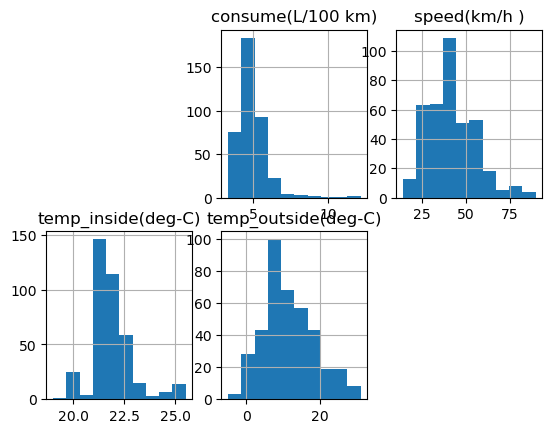

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

ax2=plt.subplot(2,3,2)
df.consume.hist(bins=10,ax=ax2)
plt.title("consume(L/100 km)")

ax3=plt.subplot(2,3,3)
df.speed.hist(bins=10,ax=ax3)
plt.title("speed(km/h )")

ax4=plt.subplot(2,3,4)
df.temp_inside.hist(bins=10,ax=ax4)
plt.title("temp_inside(deg-C)")

ax5=plt.subplot(2,3,5)
df.temp_outside.hist(bins=10,ax=ax5)
plt.title("temp_outside(deg-C)")

C:\Users\jessi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


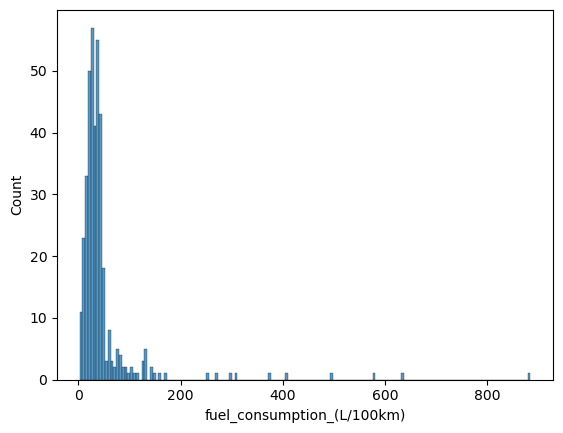

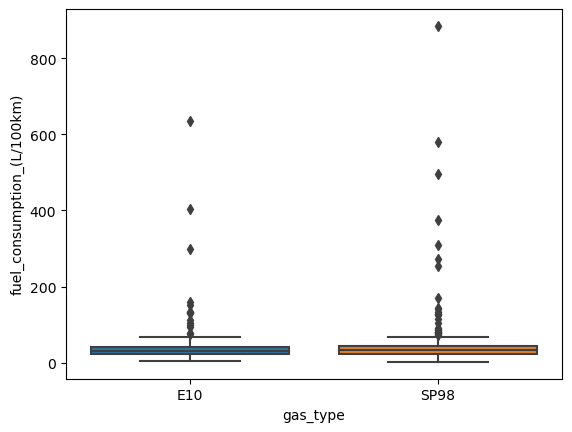

In [12]:
df['fuel_consumption_(L/100km)'] = (df['consume'] / df['distance']) * 100

# Visualization of fuel consumption distribution
sns.histplot(df['fuel_consumption_(L/100km)'])
plt.show()

# Visualization of fuel consumption by fuel type
sns.boxplot(x='gas_type', y='fuel_consumption_(L/100km)', data=df)
plt.show()

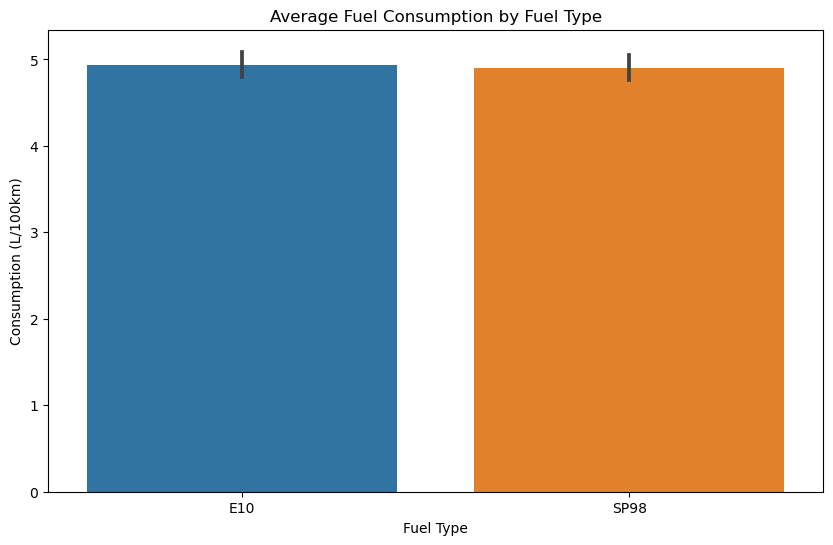

In [13]:
# Visualization of fuel consumption by fuel type
plt.figure(figsize=(10, 6))
sns.barplot(x="gas_type", y="consume", data=df)
plt.title("Average Fuel Consumption by Fuel Type")
plt.ylabel("Consumption (L/100km)")
plt.xlabel("Fuel Type")
plt.show()

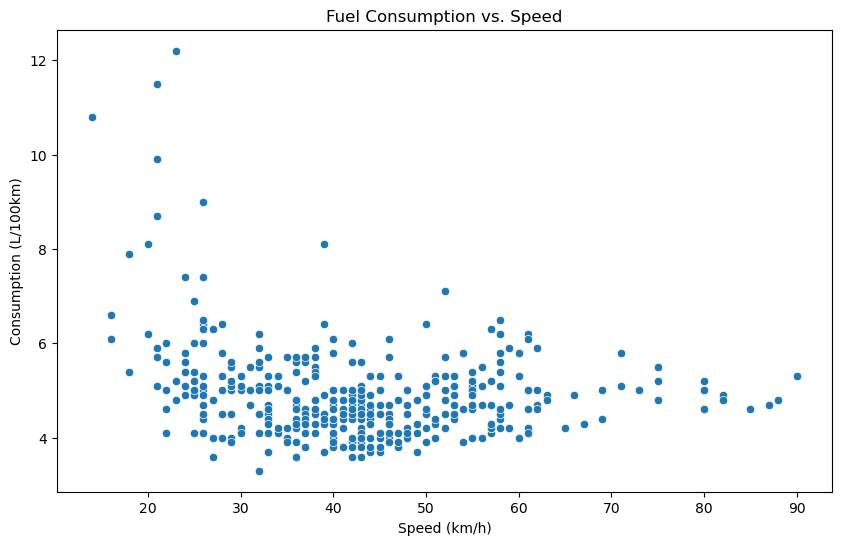

In [14]:
# Visualization of fuel consumption vs. speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x="speed", y="consume", data=df)
plt.title("Fuel Consumption vs. Speed")
plt.ylabel("Consumption (L/100km)")
plt.xlabel("Speed (km/h)")
plt.show()

C:\Users\jessi\AppData\Local\Temp\ipykernel_18156\4238181824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.ac==1].consume,ax=ax1)
C:\Users\jessi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jessi\AppData\Local\Temp\ipykernel_18156\4238181824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simi

Text(0.5, 1.0, 'AC & consume')

C:\Users\jessi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


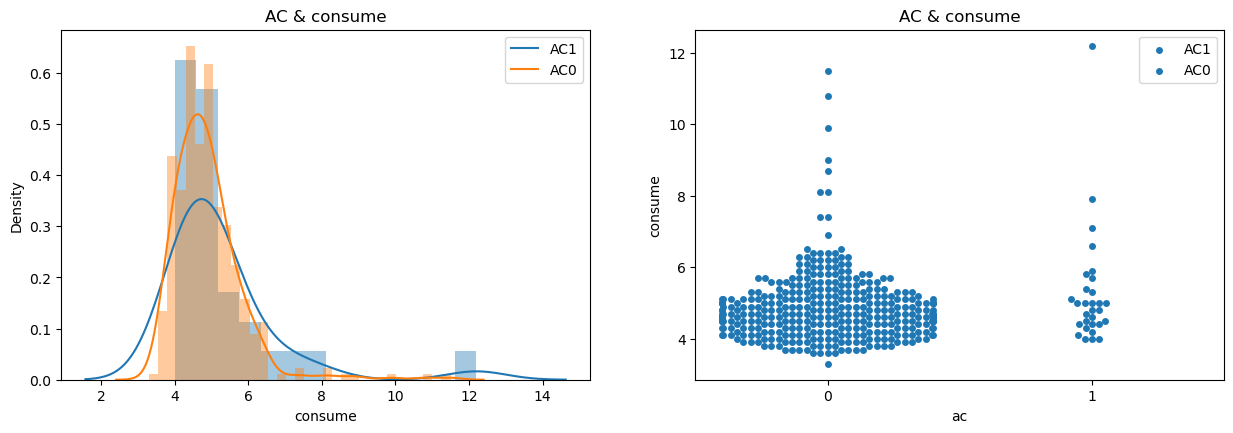

In [15]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.ac==1].consume,ax=ax1)
sns.distplot(df[df.ac==0].consume,ax=ax1)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.ac,y=df.consume,ax=ax2)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

## Predictive Analysis

In [16]:
#Hypothesis 5: Influence of External Temperature on Fuel Consumption
#H0 (Null Hypothesis): External temperature has no significant effect on fuel consumption.
#H1 (Alternative Hypothesis): External temperature has a significant effect on fuel consumption.

In [17]:
import scipy.stats as stats

correlation_coef, p_value = stats.pearsonr(df['temp_outside'], df['consume'])

print("Pearson Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)

Pearson Correlation Coefficient: -0.32081058814609714
P-value: 9.757138542590863e-11


In [18]:
#Correlation Coefficient (-0.3208): This indicates a moderate negative linear relationship between external temperature (temp_outside) and fuel consumption (consume). When the external temperature increases, the fuel consumption tends to decrease, albeit not very strongly.

#P-value (9.757138542590863e-11): This is a very small p-value. A small p-value suggests that the observed correlation is statistically significant, and the likelihood of observing such a correlation by chance is very low.

#This analysis provides a statistically significant insight into the relationship between external temperature and fuel consumption, indicating a moderate inverse relationship between the two.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparing the data
X = df[['temp_outside']]
y = df['consume']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7774467027211284


In [20]:
#MSE of 0.777 means that the average squared difference between the actual fuel consumption and the predicted values from your model is 0.777.